In [9]:
import pandas as pd

def calc(filepath):
    res = []
    i = 1
    while True:
        try:
            X = pd.read_csv(filepath + "data%d.csv"%i)
            try: #try to convert numerical marker to int, if marker not an number ignore the exception
                X = X.astype({'marker': int})
            except ValueError:
                pass
            res.insert(len(res), (X.marker.value_counts()).to_frame(name=str(i)).T)
            i+=1
        except FileNotFoundError: #if no more files found end the while 
            return pd.concat(res)
            break

In [29]:
X = calc("C:/Users/bhadr/Documents/Programming/Stage2020/Data/")

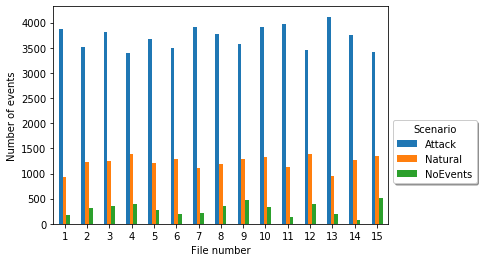

In [20]:
from matplotlib import pyplot as plt
ax = X.plot(kind='bar', rot = 0)
ax.set_xlabel("File number")
ax.set_ylabel("Number of events")
ax.legend(loc='left center', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = "Scenario")
f = ax.get_figure()
f.savefig("thesis/images/distr_3classes.pdf", bbox_inches='tight')

In [37]:
Y = calc("C:/Users/bhadr/Documents/Programming/Stage2020/multiclass/")

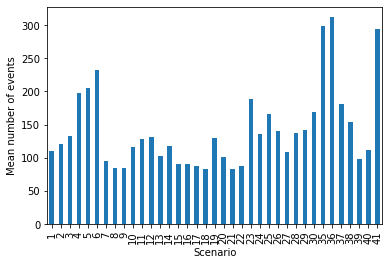

In [28]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages("thesis/images/distr_allscen.pdf") as pdf:
    ax = Y.mean().plot(kind="bar")
    ax.set_xlabel("Scenario")
    ax.set_ylabel("Mean number of events")
    pdf.savefig()

In [80]:
print(Y.mean().std())
print(X.mean().std())

61.161303335016356
1767.1959576098495


In [64]:
X.sum(1).to_frame(name="total")

,total
1,4966
2,5069
3,5415
4,5202
5,5161
6,4967
7,5236
8,5315
9,5340
10,5569


In [52]:
#covert arff to csv
for i in range(1,16):
    from scipy.io import arff
    X = arff.loadarff("multiclass/data%d Sampled Scenarios.csv.arff"%i)
    X = pd.DataFrame(X[0], dtype='float64')
    X.to_csv("multiclass/data%i.csv"%i)